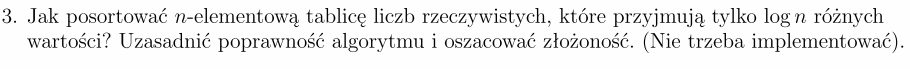

# I Sposób
### (Quicker Sort)

### Omówienie algorytmu

Najłatwiej użyć po prostu algorytmu Quicker Sort. Za każdym razem wraz z pivotem odpada $ log(n) $ wartości, które zostają umieszczone na ich finalnej pozycji. Mamy więc tylko $ log(n) $ zejść rekurencyjnych, więc całkowita złożoność obliczeniowa to $ O(n \cdot log(log(n))) $.

### Implementacja algorytmu

In [1]:
def quicker_sort(arr):
    _quicker_sort(arr, 0, len(arr) - 1)
    

def _quicker_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        lt_pivot_last, gt_pivot_first = _partition(arr, left_idx, right_idx)
        
        # If a number of elements lower tha a pivot is greater than a number
        # of elements greater than a pivot, sort recursively the shorter part
        # of elements which are greater than a pivot
        if lt_pivot_last - left_idx > right_idx - gt_pivot_first:
            _quicker_sort(arr, gt_pivot_first, right_idx)
            right_idx = lt_pivot_last  # I removed a tailing recursion
        # Otherwise, sort a subarray of elementslower than a pivot first
        # as it is shorter than a subarray of elements greater than a pivot
        else:
            _quicker_sort(arr, left_idx, lt_pivot_last)
            left_idx = gt_pivot_first  # I removed a tailing recursion

        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    
    # Partition an array into 3 subarrays (lower than, equal to and
    # greater than a pivot value)
    i = left_idx     # A pointer of the first pivot
    j = left_idx + 1 # A pointer of the element after the last pivot
    k = j            # A pointer of the currently checked element 
    while k <= right_idx:
        if arr[k] < pivot:
            _two_swaps(arr, i, j, k)
            i += 1
            j += 1
        elif arr[k] == pivot:
            _one_swap(arr, j, k)
            j += 1
        k += 1
        
    # Return the last index of the subarray of elements lower than a pivot
    # and the first index of the subarray of elements greater than a pivot
    return i - 1, j

    
def _one_swap(arr, i, j):
    # Swap two elements in an array
    arr[i], arr[j] = arr[j], arr[i]
    

def _two_swaps(arr, i, j, k):
    # Rotate right the elements of the indices specified
    arr[k], arr[j], arr[i] = arr[j], arr[i], arr[k]

###### Kilka testów

##### Funkcja pomocnicza do testów

In [2]:
import random

def test_sort(sorting_fn, *, 
              samples=20,         # A number of tests that will be performed
              val_counts=(0, 50), # A minimum and maximum number of values to sort that will be generated
              range_=(-100, 100), # A range which will be used to create a random list of values from this range
              modifies_arr=True,  # Information whether an algorithm modifies the initial array or returns a sorted array
              failed_only=False,  # Show only failed tests. Works only if no_results is set to False
              print_out_fn=None,  # An user-defined function to print additional information. Works only if no_results is set to False
              no_results=False    # When set to True, no results will be printed (useful only for benchmark)
             ): 
    passed = 0                   
    for i in range(samples):
        random_lst = [random.randint(*range_) for _ in range(random.randint(*val_counts))]
        random_lst_before = random_lst[:]
        expected = sorted(random_lst)
        output = sorting_fn(random_lst)
        if not modifies_arr:
            random_lst = output
        is_correct = random_lst == expected
        passed += is_correct
        
        if not no_results:
            if not failed_only or (failed_only and not is_correct):
                print(f'TEST #{i+1}:')
                print(f'Before sorting: {random_lst_before}')
                print(f'After sorting: {random_lst}')
                print(f'Expected result: {expected}')
                print(f'Test {"PASSED" if is_correct else "FAILED"}')
                print(f'Current passed-to-tested ratio: {passed}/{i+1}')
                if print_out_fn:
                    print(f'========== Additional results after sorting  ==========')
                    print_out_fn(random_lst)
                print()
                
    if not no_results:
        print(f'Sorting algorithms is {"correct" if passed == samples else "wrong"}')
        print(f'Passed tests in total: {passed}/{samples}')

##### Właściwe testy

In [17]:
import math

n = 10_000
max_num = math.ceil(math.log(n, 2))
test_sort(quicker_sort, range_=(-max_num, max_num), val_counts=(-n, n), samples=1, failed_only=False)

TEST #1:
Before sorting: [3, 13, 14, 10, -9, 11, 3, 9, -1, -10, -4, -12, 13, 11, 1, -2, -1, 6, 4, 4, -11, 2, 6, 3, -1, -3, 8, 12, 7, -14, 5, -12, -2, -4, -7, -9, 5, -11, 13, 5, 9, 11, -14, -4, 8, 14, -1, 11, 14, -1, 4, -5, -12, -2, -10, -14, -7, 0, 9, -3, 7, -14, 12, -6, 13, 2, -1, 5, -14, 12, 3, -13, -1, -12, 4, -1, 0, 4, 4, 5, -5, 10, 7, -11, -4, 8, -12, -3, -3, 10, 13, -10, -4, 10, 14, 4, 2, -3, 12, -6, 2, 13, -1, -2, 9, -2, -5, 12, 11, -1, -13, 11, 3, 3, -6, 0, 5, 6, -10, 13, 1, -4, 2, 7, -12, -4, 12, -14, 2, -4, 1, 1, 12, -3, 11, 11, -8, 13, -14, -8, -9, 1, -1, -6, -2, -13, 9, -5, 2, -14, 14, 0, 2, -13, 6, -7, 4, 5, -1, 1, -3, 5, -8, 2, -12, -12, 10, 5, 6, 11, 7, -8, -2, 7, -1, -4, 1, 1, -3, -13, 12, -13, 5, 7, -14, -11, -11, 2, -1, -7, 0, -14, 7, 9, -3, -2, -2, 13, -14, -12, 6, 13, 6, 8, 2, 7, 3, 3, 13, -13, 3, 11, -9, -1, -14, -6, 10, 13, -6, 7, -12, -5, 5, 3, -2, 8, -8, -12, -7, -13, 14, 0, -2, 7, -3, -6, 1, 12, 0, 9, -4, 5, 0, 14, 13, 6, -13, -6, -7, 12, -10, 6, -8, 3, 7, -11,

# II Sposób

### Implementacja algorytmu

In [21]:
def crazy_sort(arr):
    unique = []
    # Look for unique numbers and store them in a unique array
    for val in arr:
        idx = binary_search(unique, val)
        # If a value is not stored in an unique array, insert this value
        if idx < 0:
            insert_element(unique, val)
    
    counts = [0] * len(unique)
    # Count repetitions of each unique value
    for val in arr:
        idx = binary_search(unique, val)
        counts[idx] += 1
        
#     print(counts, sum(counts), len(arr))
    
    arr_idx = 0
    # Rewrite all values to the inintal array
    for i in range(len(unique)):
        for _ in range(counts[i]):
            arr[arr_idx] = unique[i]
            arr_idx += 1
        
    
def insert_element(arr, val: 'inserted value'):
    arr.append(val)
    if len(arr) > 1:
        # Move all elements that are greater than a value inserted to the right
        idx = len(arr) - 1
        while idx > 0 and arr[idx - 1] > val:
            arr[idx] = arr[idx - 1]
            idx -= 1
        # Place our value on the final position
        arr[idx] = val
        

def binary_search(arr: 'sorted sequence', val: 'searched value') -> int:
    left_idx = 0
    right_idx = len(arr)-1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if val > arr[mid_idx]:
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1
            
    return left_idx if left_idx < len(arr) and arr[left_idx] == val else -1

###### Kilka testów

In [26]:
import math

n = 100_000
max_num = math.ceil(math.log(n, 2))
test_sort(crazy_sort, range_=(-max_num, max_num), val_counts=(-n, n), samples=100, failed_only=True)

Sorting algorithms is correct
Passed tests in total: 100/100
